<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-07/Ejemplo-05/nlp_visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo 5: NLP y Visualizaciones

### 1. Objetivos:
    - Aprender qué visualizaciones podemos realizar de nuestros procesamientos de lenguaje natural

---
    
### 2. Desarrollo:

Como ya bien sabes, las visualizaciones son una parte esencial de nuestros análisis. Vamos a aprender cómo realizar algunas visualizaciones de los análisis estadísticos que ya hemos realizado. Esto nos ayudará a presentar nuestros hallazgos de manera más efectiva.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path1= "https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/raw/master/"

In [3]:
df = pd.read_json(path1 + 'Datasets/new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [4]:
df.columns

Index(['amazon_product_url', 'author', 'description', 'publisher', 'title',
       'oid', 'bestsellers_date.numberLong', 'published_date.numberLong',
       'rank.numberInt', 'rank_last_week.numberInt', 'weeks_on_list.numberInt',
       'price.numberDouble'],
      dtype='object')

In [5]:
# valores unicos de la columna
df['rank.numberInt'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14,  1, 11, 15, 16])

In [6]:
grouped_by_title = df.groupby('title')['description'].max()

In [7]:
# descripcion mas larga para cada titulo ordenadas
grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
grouped_by_title = df.groupby('title')['description'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '', regex = True)
grouped_by_title = grouped_by_title.str.replace('\d', '', regex = True)
grouped_by_title = grouped_by_title.str.replace('\\n', '', regex = True)
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

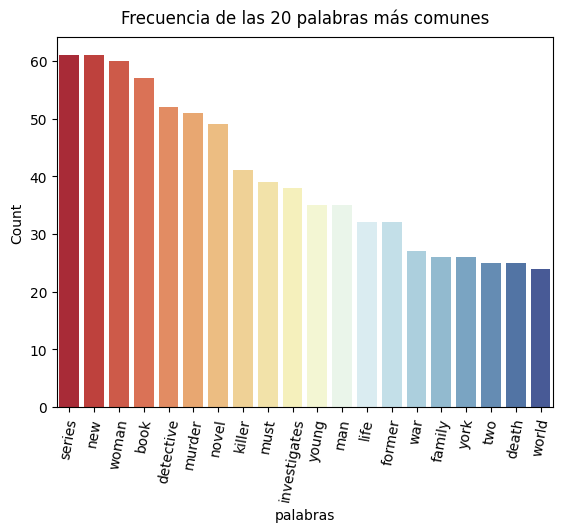

In [10]:
# Podemos visualizar la frecuencia de las palabras más comunes
cantidad = 20
most_common = np.array(list(map(lambda x: list(x), freq_dist.most_common(cantidad))))
most_common = pd.DataFrame(most_common, columns=['palabras', 'frec'])
most_common['frec'] = pd.to_numeric(most_common['frec'], errors='coerce')

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(data = most_common, x= 'palabras', y= 'frec', ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las ' + str(cantidad) + ' palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

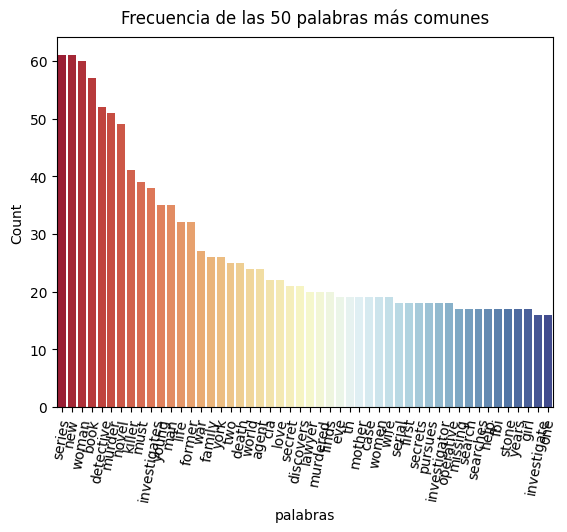

In [11]:
# Podemos visualizar la frecuencia de las palabras más comunes
cantidad = 50
most_common = np.array(list(map(lambda x: list(x), freq_dist.most_common(cantidad))))
most_common = pd.DataFrame(most_common, columns=['palabras', 'frec'])
most_common['frec'] = pd.to_numeric(most_common['frec'], errors='coerce')

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(data = most_common, x= 'palabras', y= 'frec', ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las ' + str(cantidad) + ' palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [12]:
# También podemos visualizar la frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('of', 'the'): 105, ('in', 'the'): 99, ('of', 'a'): 93, ('in', 'a'): 61, ('and', 'a'): 38, ('a', 'woman'): 34, ('book', 'of'): 33, ('for', 'the'): 32, ('to', 'the'): 31, ('and', 'the'): 30, ...})

In [13]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

<ipython-input-13-18400157ce45>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))


<ipython-input-14-be81bd314e92>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(cantidad))))


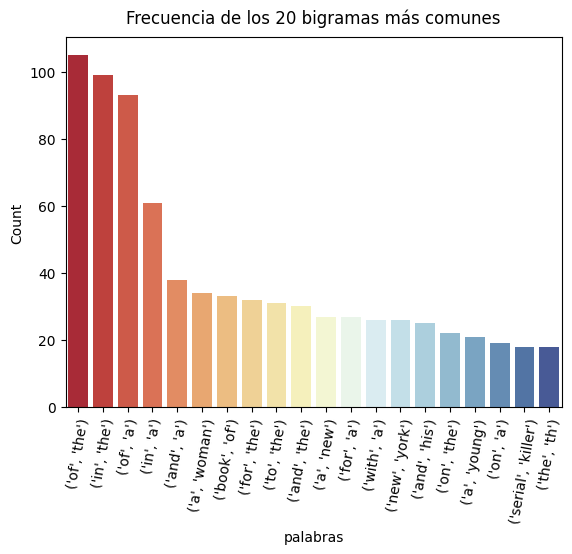

In [14]:
# Podemos visualizar la frecuencia de los bigramas más comunes
cantidad = 20
most_common = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(cantidad))))
most_common = pd.DataFrame(most_common, columns=['palabras', 'frec'])
most_common['frec'] = pd.to_numeric(most_common['frec'], errors='coerce')

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(data = most_common, x= 'palabras', y= 'frec', ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de los ' + str(cantidad) + ' bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [15]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('new', 'york'): 26, ('serial', 'killer'): 18, ('stone', 'barrington'): 12, ('los', 'angeles'): 10, ('eve', 'dallas'): 10, ('writing', 'pseudonymously'): 10, ('lt', 'eve'): 9, ('nora', 'roberts'): 9, ('roberts', 'writing'): 9, ('fbi', 'agent'): 8, ...})

<ipython-input-16-64ad13e14069>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(cantidad))))


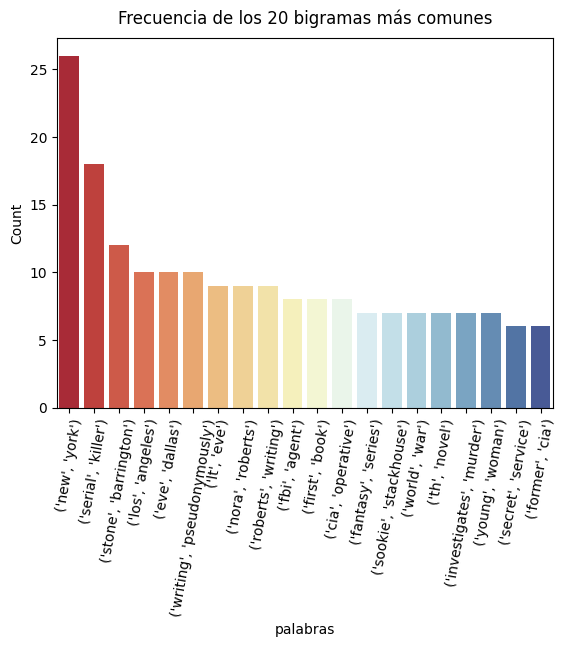

In [16]:
cantidad = 20
###
most_common = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(cantidad))))
most_common = pd.DataFrame(most_common, columns=['palabras', 'frec'])
most_common['frec'] = pd.to_numeric(most_common['frec'], errors='coerce')

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(data = most_common, x= 'palabras', y= 'frec', ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de los ' + str(cantidad) + ' bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [17]:
# No estamos restringidos solamente a bigramas

from nltk.util import ngrams

<ipython-input-18-eb4f1a4b7d64>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(cantidad))))


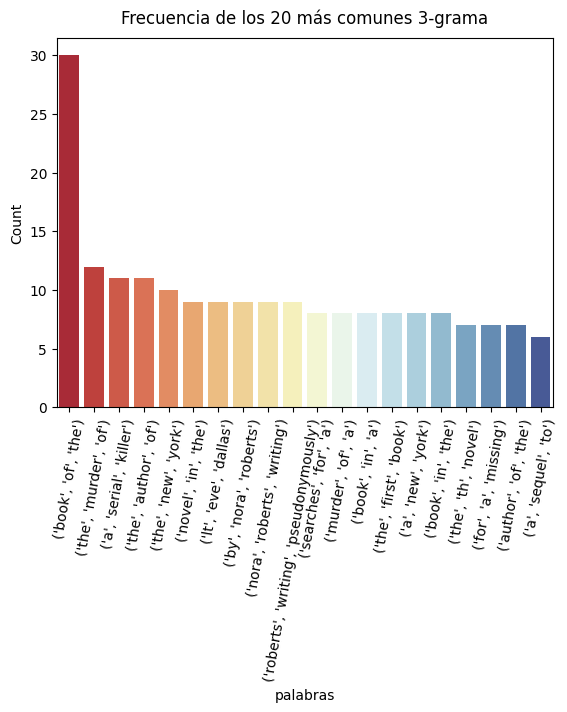

In [18]:
cantidad = 20 # las 20 más comunes
ngrama = 3
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, ngrama)))

most_common = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(cantidad))))
most_common = pd.DataFrame(most_common, columns=['palabras', 'frec'])
most_common['frec'] = pd.to_numeric(most_common['frec'], errors='coerce')

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(data = most_common, x= 'palabras', y= 'frec', ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de los ' + str(cantidad) + ' más comunes ' + str(ngrama) +'-grama', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

<ipython-input-19-e8aea30c02e0>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(cantidad))))


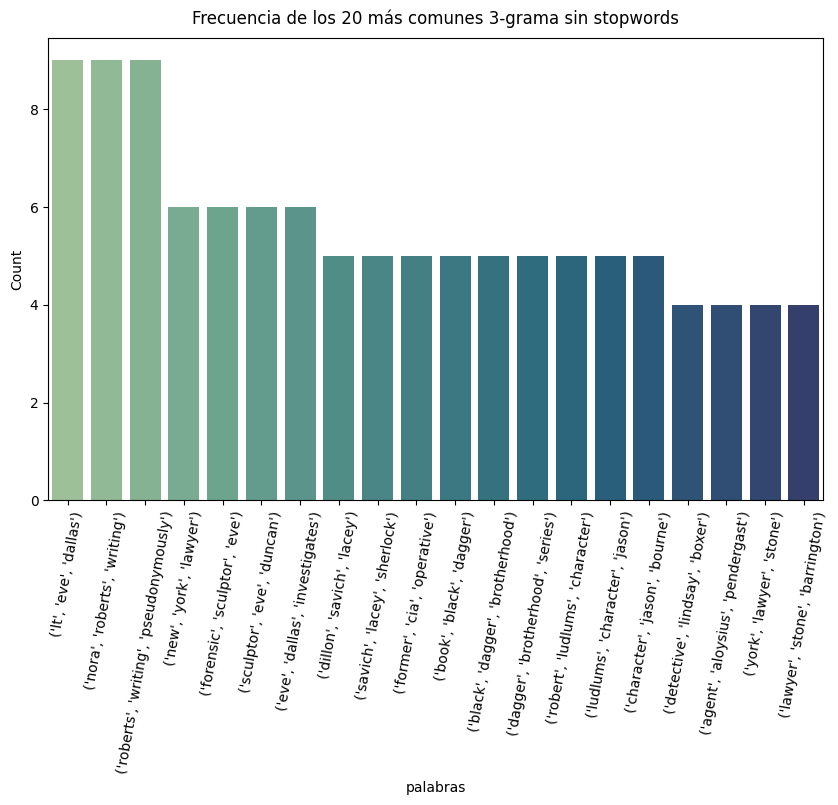

In [19]:
cantidad = 20 # las 20 más comunes
ngrama = 3
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, ngrama)))

most_common = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(cantidad))))
most_common = pd.DataFrame(most_common, columns=['palabras', 'frec'])
most_common['frec'] = pd.to_numeric(most_common['frec'], errors='coerce')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(data = most_common, x= 'palabras', y= 'frec', ax=ax, palette='crest');
ax.set_title('Frecuencia de los ' + str(cantidad) + ' más comunes ' + str(ngrama) +'-grama sin stopwords', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [20]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

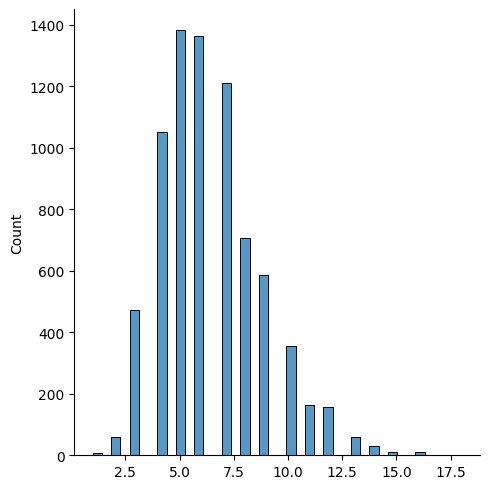

In [21]:
sns.displot(word_lengths, kind = 'hist', bins = 40);

In [22]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))

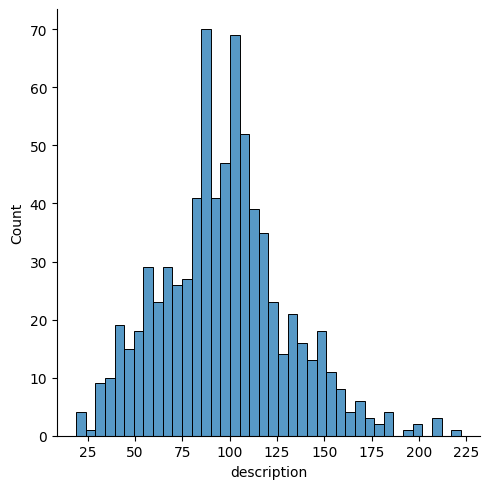

In [23]:
sns.displot(sentence_lengths, kind = 'hist', bins = 40);

In [24]:
num_of_words = grouped_by_title.str.split(' ').str.len()

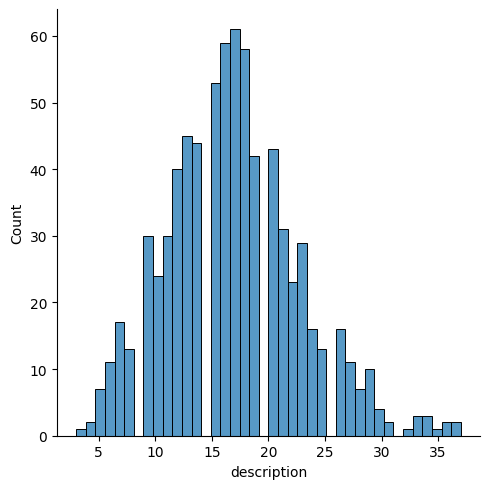

In [25]:
sns.displot(num_of_words, kind = 'hist', bins = 40);

Para terminar, vamos a hacer una nube de palabras utilizando la librería `wordcloud`.

In [26]:
from wordcloud import WordCloud

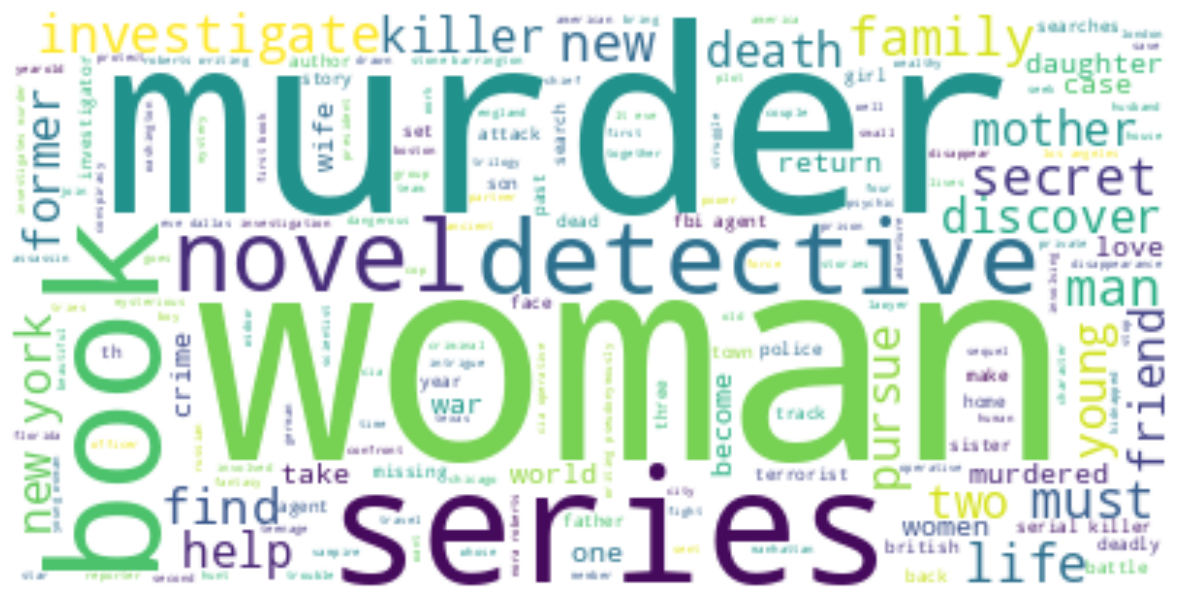

In [27]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()